# Installation of needed libaries<br>

With regard to an increasing awareness for eco-friendly ways of moving and the fact that the bike is one of the most convenient, cheapest and healthiest as well as popular means of transportation it must be ensured that cycling in Hamburg gets safer. 
Thus, the goal of our project was to analyse accident statistics of the city of Hamburg by focussing on bicycle accidents in order to provide information about most frequently reported locations of bicycle accidents. A heatmap which includes generic parameters, such as weather, weekdays or time, creates awareness and gives cyclists insights into dangerous locations of accidents in Hamburg they could avoid and creates awareness. In addition, changes in accident locations can be derived using a time series of data from 2016 to 2019. 

In [93]:
import os
import glob
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import Image
import six
from sklearn import tree
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from six import StringIO
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import pydotplus

#from keplergl import KeplerGl 
#import keplergl

## Data imports<br>

In [94]:
#As we have separate files for each year, we need to navigate to the four relevant filepaths
filepath2016 = 'data/2016/Unfallorte_2016_LinRef.txt'
filepath2017 = 'data/2017/Unfallorte2017_LinRef.txt'
filepath2018 = 'data/2018/Unfallorte2018_LinRef.txt'
filepath2019 = 'data/2019/Unfallorte2019_LinRef.txt'

In [95]:

#Importing the txt-files. As the data was published in Germany, we need to set the decimal as a comma. Seperate lines to avoid error message
df_2016 = pd.read_csv(filepath2016, delimiter=';',decimal=',')
df_2017 = pd.read_csv(filepath2017, delimiter=';',decimal=',')
df_2018 = pd.read_csv(filepath2018, delimiter=';',decimal=',')
df_2019 = pd.read_csv(filepath2019, delimiter=';',decimal=',')

C:\Users\nschumpp\Anaconda3\envs\test\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Data inspection<br>


In [96]:
#Data was read in successfully, data types are corecct, column number and names differ between years 
#24 columns for year 2019: "Ist_Sonstige" is named differently than in other years
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268370 entries, 0 to 268369
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   OBJECTID     268370 non-null  int64 
 1   ULAND        268370 non-null  int64 
 2   UREGBEZ      268370 non-null  int64 
 3   UKREIS       268370 non-null  int64 
 4   UGEMEINDE    268370 non-null  int64 
 5   UJAHR        268370 non-null  int64 
 6   UMONAT       268370 non-null  int64 
 7   USTUNDE      268370 non-null  int64 
 8   UWOCHENTAG   268370 non-null  int64 
 9   UKATEGORIE   268370 non-null  int64 
 10  UART         268370 non-null  int64 
 11  UTYP1        268370 non-null  int64 
 12  ULICHTVERH   268370 non-null  int64 
 13  IstRad       268370 non-null  int64 
 14  IstPKW       268370 non-null  int64 
 15  IstFuss      268370 non-null  int64 
 16  IstKrad      268370 non-null  int64 
 17  IstGkfz      268370 non-null  int64 
 18  IstSonstige  268370 non-null  int64 
 19  LI

In [97]:
#Checking the basic decriptive information about variables; information matches the provided meta data sheet ("DSB_Unfallatlas.pdf")
df_2019.describe()

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,STRZUSTAND
count,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.0,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.00000,268370.000000,268370.000000,268370.000000
mean,134185.500000,7.282833,2.853404,41.665525,63.106573,2019.0,6.701714,13.249048,4.104196,2.793207,3.891117,3.844640,0.441573,0.277784,0.804162,0.094262,0.13841,0.050143,0.098878,0.282185
std,77471.890209,3.585170,2.457828,25.923244,107.834334,0.0,3.266014,4.786792,1.867870,0.428173,2.560706,2.116382,0.796565,0.447907,0.396845,0.292193,0.34533,0.218241,0.298499,0.490314
min,1.000000,1.000000,0.000000,1.000000,0.000000,2019.0,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,67093.250000,5.000000,1.000000,15.000000,0.000000,2019.0,4.000000,10.000000,3.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,134185.500000,7.000000,3.000000,41.000000,16.000000,2019.0,7.000000,14.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,201277.750000,9.000000,4.000000,62.000000,89.000000,2019.0,9.000000,17.000000,6.000000,3.000000,5.000000,6.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000
max,268370.000000,16.000000,9.000000,91.000000,718.000000,2019.0,12.000000,23.000000,7.000000,3.000000,9.000000,7.000000,2.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.000000


In [98]:
#24 columns for year 2018, "OBJECTID" is named differently than in other years
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211868 entries, 0 to 211867
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   OBJECTID_1  211868 non-null  int64 
 1   ULAND       211868 non-null  int64 
 2   UREGBEZ     211868 non-null  int64 
 3   UKREIS      211868 non-null  int64 
 4   UGEMEINDE   211868 non-null  int64 
 5   UJAHR       211868 non-null  int64 
 6   UMONAT      211868 non-null  int64 
 7   USTUNDE     211868 non-null  int64 
 8   UWOCHENTAG  211868 non-null  int64 
 9   UKATEGORIE  211868 non-null  int64 
 10  UART        211868 non-null  int64 
 11  UTYP1       211868 non-null  int64 
 12  ULICHTVERH  211868 non-null  int64 
 13  IstRad      211868 non-null  int64 
 14  IstPKW      211868 non-null  int64 
 15  IstFuss     211868 non-null  int64 
 16  IstKrad     211868 non-null  int64 
 17  IstGkfz     211868 non-null  int64 
 18  IstSonstig  211868 non-null  int64 
 19  STRZUSTAND  211868 non-

In [99]:
#24 columns for year 2017, "IstGkfz" is missing, "UIDENTSTLA" is redundant, "LICHT" is named differently
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195229 entries, 0 to 195228
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   OBJECTID    195229 non-null  int64 
 1   UIDENTSTLA  195229 non-null  object
 2   ULAND       195229 non-null  int64 
 3   UREGBEZ     195229 non-null  int64 
 4   UKREIS      195229 non-null  int64 
 5   UGEMEINDE   195229 non-null  int64 
 6   UJAHR       195229 non-null  int64 
 7   UMONAT      195229 non-null  int64 
 8   USTUNDE     195229 non-null  int64 
 9   UWOCHENTAG  195229 non-null  int64 
 10  UKATEGORIE  195229 non-null  int64 
 11  UART        195229 non-null  int64 
 12  UTYP1       195229 non-null  int64 
 13  IstRad      195229 non-null  int64 
 14  IstPKW      195229 non-null  int64 
 15  IstFuss     195229 non-null  int64 
 16  IstKrad     195229 non-null  int64 
 17  IstSonstig  195229 non-null  int64 
 18  LICHT       195229 non-null  int64 
 19  STRZUSTAND  195229 non-

In [100]:
#25 columns for year 2016, "FID" is redundand
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151673 entries, 0 to 151672
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   FID         151673 non-null  int64 
 1   OBJECTID    151673 non-null  int64 
 2   ULAND       151673 non-null  int64 
 3   UREGBEZ     151673 non-null  int64 
 4   UKREIS      151673 non-null  int64 
 5   UGEMEINDE   151673 non-null  int64 
 6   UJAHR       151673 non-null  int64 
 7   UMONAT      151673 non-null  int64 
 8   USTUNDE     151673 non-null  int64 
 9   UWOCHENTAG  151673 non-null  int64 
 10  UKATEGORIE  151673 non-null  int64 
 11  UART        151673 non-null  int64 
 12  UTYP1       151673 non-null  int64 
 13  ULICHTVERH  151673 non-null  int64 
 14  IstStrasse  151673 non-null  int64 
 15  IstRad      151673 non-null  int64 
 16  IstPKW      151673 non-null  int64 
 17  IstFuss     151673 non-null  int64 
 18  IstKrad     151673 non-null  int64 
 19  IstGkfz     151673 non-

## Adjusting structure of individual data sheets<br>


In [101]:
df_2019.rename(columns={'IstSonstige': 'IstSonstig'}, inplace=True)
#checking if the changes worked
#df_2019.info()

In [102]:
df_2018.rename(columns={'OBJECTID_1': 'OBJECTID'}, inplace=True)

#checking if the changes worked
#df_2018.info()

In [103]:
df_2017.drop(df_2017.columns[1], axis=1, inplace=True)
df_2017.rename(columns={'LICHT': 'ULICHTVERH'}, inplace=True)
#checking if the changes worked
#df_2017.info()

In [104]:
#delete the unnecessary columns
df_2016.rename(columns={'IstStrasse': 'STRZUSTAND'}, inplace=True)
df_2016.drop('FID', axis=1, inplace=True)

#checking if the changes worked
#df_2016.info()


## Combining data to one dataframe<br>

In [105]:

# new dataframe (alle Jahre)
dfs = [df_2016, df_2017, df_2018, df_2019]
df_concat = pd.concat(dfs)

In [106]:
df_concat.describe()

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP1,ULICHTVERH,STRZUSTAND,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstig
count,827140.00000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,631911.000000,827140.000000
mean,107618.05428,7.485727,2.780850,41.650878,74.444528,2017.721686,6.719216,13.267426,4.100752,2.790679,3.962610,3.844081,0.436658,0.282557,0.260616,0.810794,0.088249,0.143469,0.051327,0.109625
std,66672.85815,3.522928,2.251166,25.728318,114.846793,1.102954,3.235969,4.805245,1.870905,0.431494,2.562454,2.120376,0.793444,0.500551,0.438971,0.391673,0.283656,0.350551,0.220664,0.312422
min,1.00000,1.000000,0.000000,1.000000,0.000000,2016.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51697.00000,5.000000,1.000000,16.000000,0.000000,2017.000000,4.000000,10.000000,3.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,103393.00000,8.000000,3.000000,37.000000,22.000000,2018.000000,7.000000,14.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,156228.00000,9.000000,4.000000,62.000000,118.000000,2019.000000,9.000000,17.000000,6.000000,3.000000,5.000000,6.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,268370.00000,16.000000,9.000000,91.000000,718.000000,2019.000000,12.000000,23.000000,7.000000,3.000000,9.000000,7.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Filtering relevant data for the project<br>

In [107]:
#Filtering only data from Hamburg and bike accidents
df = df_concat.loc[(df_concat['IstRad'] == 1) & (df_concat['ULAND']==2)]

In [108]:
df.describe()

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP1,ULICHTVERH,STRZUSTAND,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstig
count,9019.000000,9019.0,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.0,9019.000000,9019.000000,9019.000000,6839.000000,9019.000000
mean,114268.746757,2.0,3.336179,6.573013,348.808848,2017.525225,6.855305,13.233285,4.062535,2.905200,3.628784,3.799867,0.321100,0.227852,1.0,0.681894,0.082271,0.010201,0.020471,0.088480
std,42798.115215,0.0,1.702043,4.626534,168.811413,1.118456,2.949343,4.578789,1.696236,0.297089,1.948812,1.786564,0.699784,0.435806,0.0,0.465767,0.274792,0.100488,0.141615,0.284007
min,6023.000000,2.0,1.000000,1.000000,101.000000,2016.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,97697.000000,2.0,2.000000,3.000000,212.000000,2017.000000,5.000000,9.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,124491.000000,2.0,3.000000,5.000000,320.000000,2018.000000,7.000000,14.000000,4.000000,3.000000,5.000000,3.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
75%,128307.000000,2.0,5.000000,9.000000,508.000000,2019.000000,9.000000,17.000000,5.000000,3.000000,5.000000,6.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
max,163331.000000,2.0,7.000000,20.000000,718.000000,2019.000000,12.000000,23.000000,7.000000,3.000000,9.000000,7.000000,2.000000,2.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
#Making the data more "readable" with clear names instead of number codes
#Renaming districs
df.loc[df["UREGBEZ"]==1, "UREGBEZ"] = "HH-Mitte"
df.loc[df["UREGBEZ"]==2, "UREGBEZ"] = "Altona"
df.loc[df['UREGBEZ']==3, "UREGBEZ"] = "Eimsbüttel"
df.loc[df['UREGBEZ']==4, "UREGBEZ"] = "HH-Nord"
df.loc[df['UREGBEZ']==5, "UREGBEZ"] = "Wandsbek"
df.loc[df['UREGBEZ']==6, "UREGBEZ"] = "Bergedorf"
df.loc[df['UREGBEZ']==7, "UREGBEZ"] = "Harburg"

C:\Users\nschumpp\Anaconda3\envs\test\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [110]:
#NICHT SICHER OB DAS DIE ANALYSE DANACH VERHINDERT!!

#Renaming the accident category
#df.loc[df["UKATEGORIE"]==1, "UREGBEZ"] = "accident with fatalities"
#df.loc[df["UKATEGORIE"]==2, "UREGBEZ"] = "accident with serious injuries"
#df.loc[df["UKATEGORIE"]==3, "UREGBEZ"] = "accident with minor injuries"

In [111]:
print(df)

        OBJECTID  ULAND     UREGBEZ  UKREIS  UGEMEINDE  UJAHR  UMONAT  \
6188        6189      2   Bergedorf       2        603   2016       4   
6572        6573      2     HH-Nord       2        405   2016       2   
6589        6590      2     HH-Nord       8        418   2016       3   
6606        6607      2  Eimsbüttel       6        318   2016       3   
6695        6696      2      Altona       9        221   2016       1   
...          ...    ...         ...     ...        ...    ...     ...   
163316    163317      2      Altona       5        215   2019      12   
163319    163320      2    HH-Mitte      18        139   2019      12   
163321    163322      2  Eimsbüttel       2        312   2019      12   
163323    163324      2     Harburg      14        715   2019      12   
163330    163331      2    Wandsbek       5        513   2019      12   

        USTUNDE  UWOCHENTAG  UKATEGORIE  ...  IstRad  IstPKW  IstFuss  \
6188         15           2           3  ...      

In [112]:
#Exporting data as a single file
#df.to_csv(r'merged_data_all_years.csv', index = False, sep=";")

### Describe data<br>


Text(0.5, 1.0, 'Amount of Accidents per Month per Year')

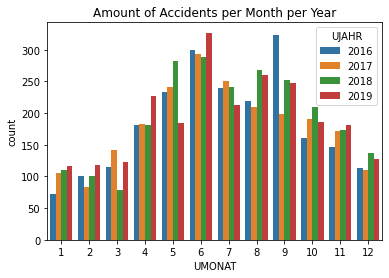

In [162]:
# Getting an overview of the amounts of bike accidents per months per year (2016-2019)
sns.countplot(x="UMONAT", hue="UJAHR", data=df)
plt.title('Amount of Accidents per Month per Year')

In [114]:
# In the summer months, the amount of bike accidents is higher than in the winter months
# It seems like the amount of accidents might be more in 2018 and 2019 compared to 2016 and 2017

2016    2206
2017    2180
2018    2323
2019    2310
Name: UJAHR, dtype: int64

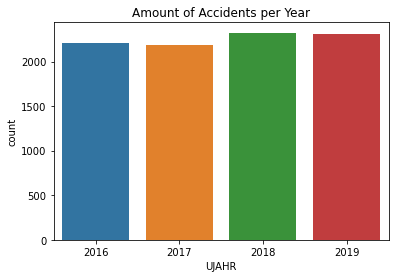

In [115]:
# Comparing the total amount of accidents per year
sns.countplot(data=df, x="UJAHR")
plt.title('Amount of Accidents per Year')
pd.value_counts(df["UJAHR"]).sort_index()

In [116]:
# More accidents in 2019 and 2018 than in 2017 and 2016

1     522
2    1461
3    1614
4    1653
5    1555
6    1531
7     683
Name: UWOCHENTAG, dtype: int64

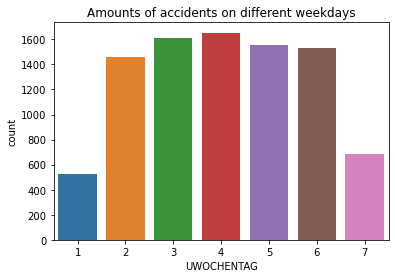

In [117]:
# Comparing the total amount of accidents per weekday
sns.countplot(data=df, x="UWOCHENTAG")
plt.title('Amounts of accidents on different weekdays')
pd.value_counts(df["UWOCHENTAG"]).sort_index()

In [29]:
# 1 = Sunday, 7 = Saturday
# Most accidents appear during the week from Monday until Friday

Text(0.5, 1.0, 'Amounts of accidents on different times of the day')

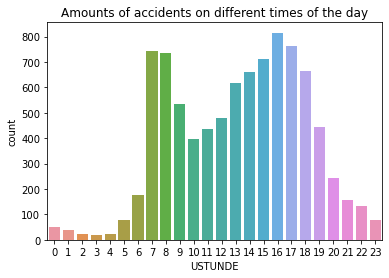

In [118]:
# Comparing the total amount of accidents depending on the time of the day
sns.countplot(data=df, x="USTUNDE")
plt.title('Amounts of accidents on different times of the day')

In [31]:
# Most accidents appear in the morning hours and in the late afternoon / early evening

Altona        1514
Bergedorf      427
Eimsbüttel    1569
HH-Mitte      1708
HH-Nord       1759
Harburg        419
Wandsbek      1623
Name: UREGBEZ, dtype: int64

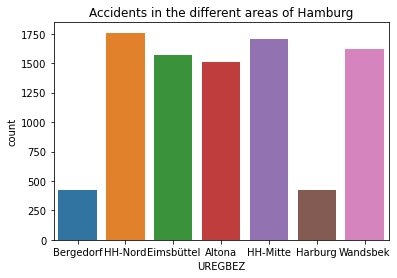

In [119]:
# Comparing the different amount of bike accidents in the different areas of Hamburg
sns.countplot(data=df, x="UREGBEZ")
plt.title('Accidents in the different areas of Hamburg')
pd.value_counts(df["UREGBEZ"]).sort_index()

In [33]:
# The fewest accidents appear in Bergedorf and Harburg

0    7027
1    1929
2      63
Name: STRZUSTAND, dtype: int64

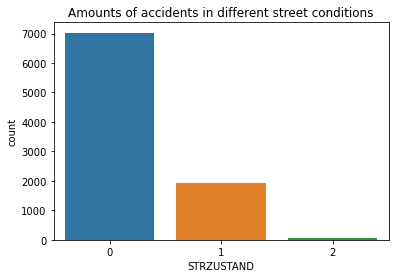

In [120]:
# Comparing the different street conditions while the bike accidents appeared
# 0 = dry, 1 = wet/damp/slippery, 2 = icy
sns.countplot(data=df, x="STRZUSTAND")
plt.title('Amounts of accidents in different street conditions')
pd.value_counts(df["STRZUSTAND"]).sort_index()

In [35]:
# Most accidents appear when the streets are dry, less when the streets are slippery  
# and only a few when the streets are icy

0    7348
1     446
2    1225
Name: ULICHTVERH, dtype: int64

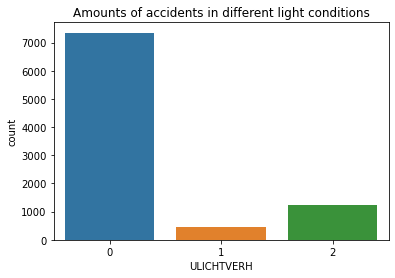

In [121]:
# Comparing the different lighting conditions while the bike accidents appeared
# 0 = daylight, 1 = dusk/dawn, 2 = darkness
sns.countplot(data=df, x="ULICHTVERH")
plt.title('Amounts of accidents in different light conditions')
pd.value_counts(df["ULICHTVERH"]).sort_index()

In [37]:
# Most of the accidents occure in daylight

1      11
2     833
3    8175
Name: UKATEGORIE, dtype: int64

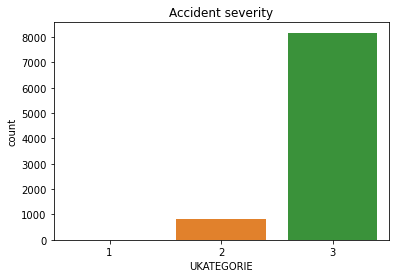

In [122]:
# Comparing the different lighting conditions while the bike accidents appeared
# 1 = deadly, 2 = seriously injured, 3 = lightly injured
sns.countplot(data=df, x="UKATEGORIE")
plt.title('Accident severity')
pd.value_counts(df["UKATEGORIE"]).sort_index()

In [39]:
# Most of the people in accidents are slightly injured, some are seriously injured
# and 11 people died in bike accidents

In [40]:
sns.pairplot

<function seaborn.axisgrid.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)>

# Heatmap<br>

In [41]:
#Configuration of the map
config = {
'version': 'v1',
'config': {
    'mapState': {
        'latitude': 53.6,
        'longitude': 10,
        'zoom': 8
    }}}


In [42]:
#load the map 
map_1 = KeplerGl(height=800, data={"data_1": df}, config=config, )

NameError: name 'KeplerGl' is not defined

In [ ]:
#show the map
#it is important to select a layer
map_1

In [167]:
### Regression<br>

C:\Users\nschumpp\Anaconda3\envs\test\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

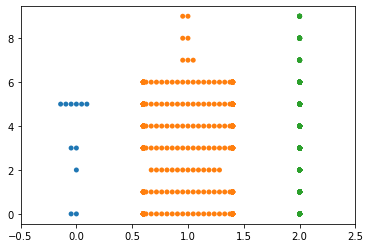

In [149]:
# Creation Swarmplot from UKATEGORIE and UART: most accidents lead to minor injuries ==3
sns.swarmplot(x='UKATEGORIE', y='UART', data=df)
plt.show()

# Creation Swarmplot from UKATEGORIE and UART: most accidents lead to minor injuries ==3 with other crossing vehicles == 5
sns.jointplot(x='UKATEGORIE', y='UART', data=df)
plt.show()

In [165]:
### Decision Tree


In [148]:
#Decision Tree; y = dependent variable/ UKATEGORIE; x = independent variable/ UKREIS & UGEMEINDE )
x=df.iloc[:,[3, 4]]
y=df.iloc[:,[9]]
f=df.iloc[:,[4]]
f


,UGEMEINDE
6188,603
6572,405
6589,418
6606,318
6695,221
...,...
163316,215
163319,139
163321,312
163323,715


In [ ]:
from sklearn.model_selection import train_test_split

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [126]:
regressor=DecisionTreeRegressor(random_state=0)

In [127]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [128]:
output= regressor.predict(x_test)
#identify quality of test data

In [129]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [130]:
#accuracy of UKATEGORIE is 90% right
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9085365853658537


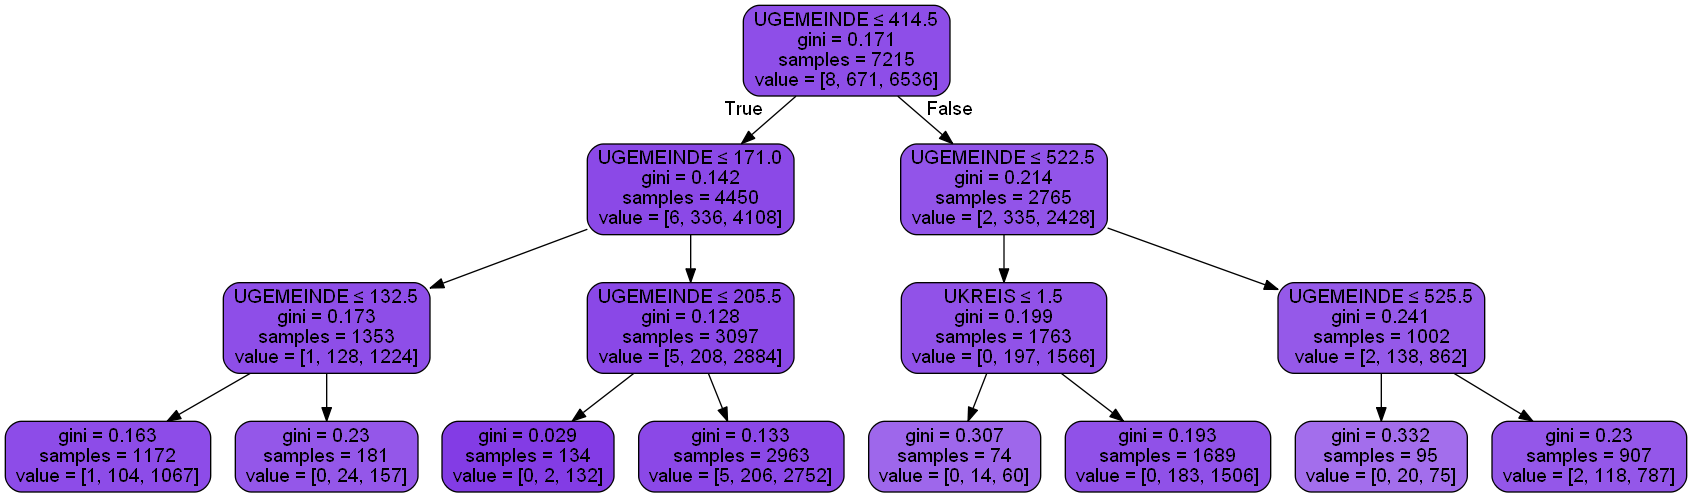

In [132]:
feature_cols = [ 'UKREIS', 'UGEMEINDE']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('FahrradUnfall.png')
Image(graph.create_png())

In [153]:
#Decision Tree; y = dependent variable/ UKATEGORIE; x = independent variable/ Monat, Wochentag & Zeit )
v=df.iloc[:,[5, 6, 7]]
z=df.iloc[:,[9]]
f=df.iloc[:,[5]]

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
v_train,v_test,z_train,z_test=train_test_split(v,z,test_size=0.20,random_state=0)

In [156]:
regressor=DecisionTreeRegressor(random_state=0)

In [157]:
regressor.fit(v_train,z_train)

DecisionTreeRegressor(random_state=0)

In [158]:
output= regressor.predict(v_test)
#identify quality of test data

In [159]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(v_train,z_train)

#Predict the response for test dataset
z_pred = clf.predict(v_test)

In [160]:
#accuracy of UKATEGORIE is 90% right
print("Accuracy:",metrics.accuracy_score(z_test, z_pred))

Accuracy: 0.9085365853658537


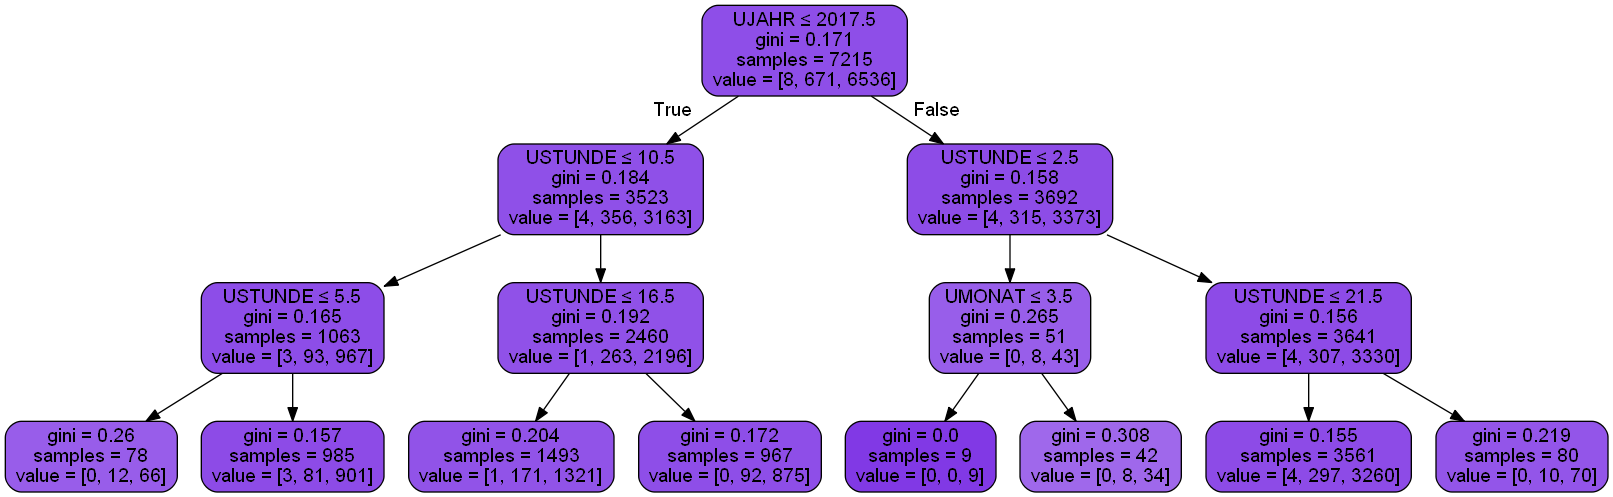

In [161]:
feature_cols = [ 'UJAHR', 'UMONAT', 'USTUNDE']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('FahrradUnfall1.png')
Image(graph.create_png())